In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset and model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Set visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [8]:
# Load the dataset
cancer = load_breast_cancer()
# Create a DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # 0: Malignant, 1: Benign

print("Dataset successfully loaded.")
print("Shape of the DataFrame:", df.shape)

Dataset successfully loaded.
Shape of the DataFrame: (569, 31)


In [12]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
# Get a concise summary
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo


Target Variable Distribution:
target
1    357
0    212
Name: count, dtype: int64


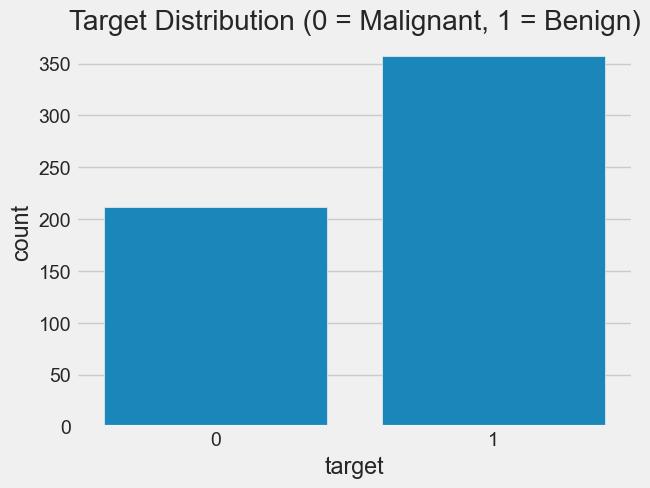

In [16]:
# Check the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title('Target Distribution (0 = Malignant, 1 = Benign)')
plt.show()

#### The dataset contains a little over 350 benign samples and over 200 malignant samples. While not perfectly balanced, it's balanced enough that we don't need to apply special techniques like SMOTE for this initial analysis.

In [20]:
# 1. Define Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled.")

Data successfully split and scaled.


In [24]:
# Create and train the Logistic Regression model
model = LogisticRegression(solver='liblinear') # A good solver for this problem
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [26]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Accuracy ---")
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy:.2%})")
print("Accuracy tells us the percentage of correct predictions overall.")

--- Accuracy ---
Overall Accuracy: 0.9737 (97.37%)
Accuracy tells us the percentage of correct predictions overall.


#### An accuracy of ~97% seems fantastic, but it doesn't tell the whole story. We need to know what kind of errors the model is making.


--- Confusion Matrix ---


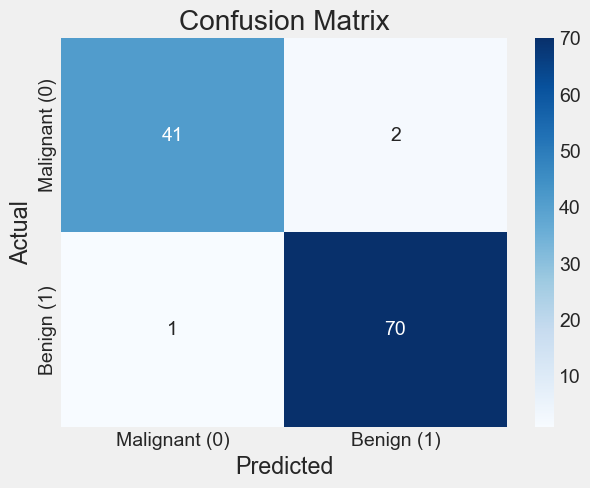

Interpreting the Matrix:
True Negatives (TN): 41 - Correctly predicted Malignant.
False Positives (FP): 2 - Incorrectly predicted Benign (Type I Error).
False Negatives (FN): 1 - Incorrectly predicted Malignant (Type II Error) - THIS IS THE WORST ERROR!
True Positives (TP): 70 - Correctly predicted Benign.


In [29]:
# Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant (0)', 'Benign (1)'], yticklabels=['Malignant (0)', 'Benign (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("Interpreting the Matrix:")
print(f"True Negatives (TN): {cm[0,0]} - Correctly predicted Malignant.")
print(f"False Positives (FP): {cm[0,1]} - Incorrectly predicted Benign (Type I Error).")
print(f"False Negatives (FN): {cm[1,0]} - Incorrectly predicted Malignant (Type II Error) - THIS IS THE WORST ERROR!")
print(f"True Positives (TP): {cm[1,1]} - Correctly predicted Benign.")

##### The confusion matrix gives us the raw numbers. We can see our model made 1 False Positive and 2 False Negatives. In a medical context, a False Negative (predicting a malignant tumor is benign) is far more dangerous than a False Positive.

Precision (for Malignant): When our model predicts a tumor is Malignant, it is correct 95% of the time. (TN / (TN + FN)).

Recall (for Malignant): Of all the tumors that were actually Malignant, our model correctly identified 98% of them. (TN / (TN + FP)). This is also called Sensitivity.

F1-Score: The harmonic mean of Precision and Recall. It provides a single score that balances both concerns. A high F1-score indicates a robust model.

##### Performance is More Than Accuracy: This project clearly demonstrates that a high accuracy score can hide critical weaknesses. For a cancer diagnosis model, a high Recall (Sensitivity) for the malignant class is the most important metric. We want to minimize False Negatives at all costs, even if it means accepting a few more False Positives (which would lead to further testing).

##### Model Success: Our simple Logistic Regression model performed exceptionally well, achieving a Recall of 98% for the malignant class. This means it is very effective at its most important job: identifying cancerous tumors.
